In [ ]:
import sys
import logging
import numpy as np
import torch
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
import os
import shutil       

pin_memory = torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
dtype = torch.cuda.FloatTensor
data_dir = '/home/marafath/projects/rrg-hamarneh/marafath/data/pox_data/augmented_images'

n_fold = 5
n_mo_train = (117//n_fold)
n_ch_train = (178//n_fold)
n_sm_train = (358//n_fold)
n_co_train = (54//n_fold)
n_me_train = (47//n_fold)
n_he_train = (50//n_fold)

smallest = 47 #measles
n_mo = (smallest*49)//117
n_ch = (smallest*49)//178
n_sm = (smallest*49)//358
n_co = (smallest*49)//54
n_me = (smallest*49)//47
n_he = (smallest*49)//50

print(n_mo_train, n_ch_train, n_sm_train, n_co_train, n_me_train, n_he_train)
#23 35 71 10 9 10

In [ ]:
np.random.seed(42)   
idx_mo = np.random.permutation(117)+1
idx_ch = np.random.permutation(178)+1
idx_sm = np.random.permutation(358)+1
idx_co = np.random.permutation(54)+1
idx_me = np.random.permutation(47)+1
idx_he = np.random.permutation(50)+1

fold = 0
train_image = []
train_label = []
validation_image = []
validation_label = []

#monkeypox
start_mo = fold*n_mo_train
end_mo = (fold+1)*n_mo_train

for i in range(0, 117):
    if i >= start_mo and i < end_mo:
        validation_image.append(os.path.join(data_dir, 'monkeypox', 'aug_mo_'+str(idx_mo[i]).zfill(4)+'_0001.jpg'))
        validation_label.append(1)
    else:
        for j in range(1, n_mo+1):
            train_image.append(os.path.join(data_dir, 'monkeypox', 'aug_mo_'+str(idx_mo[i]).zfill(4)+'_'+str(j).zfill(4)+'.jpg'))
            train_label.append(1)

#chickenpox
start_ch = fold*n_ch_train
end_ch = (fold+1)*n_ch_train

for i in range(0, 178):
    if i >= start_ch and i < end_ch:
        validation_image.append(os.path.join(data_dir, 'chickenpox', 'aug_ch_'+str(idx_ch[i]).zfill(4)+'_0001.jpg'))
        validation_label.append(2)
    else:
        for j in range(1, n_ch+1):
            train_image.append(os.path.join(data_dir, 'chickenpox', 'aug_ch_'+str(idx_ch[i]).zfill(4)+'_'+str(j).zfill(4)+'.jpg'))
            train_label.append(2)
            
#smallpox
start_sm = fold*n_sm_train
end_sm = (fold+1)*n_sm_train

for i in range(0, 358):
    if i >= start_sm and i < end_sm:
        validation_image.append(os.path.join(data_dir, 'smallpox', 'aug_sm_'+str(idx_sm[i]).zfill(4)+'_0001.jpg'))
        validation_label.append(3)
    else:
        for j in range(1, n_sm+1):
            train_image.append(os.path.join(data_dir, 'smallpox', 'aug_sm_'+str(idx_sm[i]).zfill(4)+'_'+str(j).zfill(4)+'.jpg'))
            train_label.append(3)

#cowpox
start_co = fold*n_co_train
end_co = (fold+1)*n_co_train

for i in range(0, 54):
    if i >= start_co and i < end_co:
        validation_image.append(os.path.join(data_dir, 'cowpox', 'aug_co_'+str(idx_co[i]).zfill(4)+'_0001.jpg'))
        validation_label.append(4)
    else:
        for j in range(1, n_co+1):
            train_image.append(os.path.join(data_dir, 'cowpox', 'aug_co_'+str(idx_co[i]).zfill(4)+'_'+str(j).zfill(4)+'.jpg'))
            train_label.append(4)

#measles
start_me = fold*n_me_train
end_me = (fold+1)*n_me_train

for i in range(0, 47):
    if i >= start_me and i < end_me:
        validation_image.append(os.path.join(data_dir, 'measles', 'aug_me_'+str(idx_me[i]).zfill(4)+'_0001.jpg'))
        validation_label.append(5)
    else:
        for j in range(1, n_me+1):
            train_image.append(os.path.join(data_dir, 'measles', 'aug_me_'+str(idx_me[i]).zfill(4)+'_'+str(j).zfill(4)+'.jpg'))
            train_label.append(5)

#healthy
start_he = fold*n_he_train
end_he = (fold+1)*n_he_train

for i in range(0, 50):
    if i >= start_he and i < end_he:
        validation_image.append(os.path.join(data_dir, 'healthy', 'aug_he_'+str(idx_he[i]).zfill(4)+'_0001.jpg'))
        validation_label.append(6)
    else:
        for j in range(1, n_he+1):
            train_image.append(os.path.join(data_dir, 'healthy', 'aug_he_'+str(idx_he[i]).zfill(4)+'_'+str(j).zfill(4)+'.jpg'))
            train_label.append(6)

In [ ]:
np.random.seed(42)   
idx_mo = np.random.permutation(117)+1
idx_ch = np.random.permutation(178)+1
idx_sm = np.random.permutation(358)+1
idx_co = np.random.permutation(54)+1
idx_me = np.random.permutation(47)+1
idx_he = np.random.permutation(50)+1

In [ ]:
fold = 4
root = '/home/marafath/projects/rrg-hamarneh/marafath/data/pox_data/'
if not os.path.exists(os.path.join(root, f'fold_{fold+1}')):
    os.makedirs(os.path.join(root, f'fold_{fold+1}'))

In [ ]:
#monkeypox
start_mo = fold*n_mo_train
end_mo = (fold+1)*n_mo_train

for i in range(0, 117):
    if idx_mo[i] == 111 or idx_mo[i] == 92 or idx_mo[i] == 106:
        continue
    if i >= start_mo and i < end_mo:
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'validation')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'validation'))
                                           
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'validation', 'monkeypox')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'validation', 'monkeypox'))
                                    
        shutil.copy(os.path.join(data_dir, 'monkeypox', 'aug_mo_'+str(idx_mo[i]).zfill(4)+'_0001.jpg'), os.path.join(root, f'fold_{fold+1}', 'validation', 'monkeypox'))
    else:
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'training')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'training'))   
            
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'training', 'monkeypox')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'training', 'monkeypox'))
            
        for j in range(1, n_mo+1):
            shutil.copy(os.path.join(data_dir, 'monkeypox', 'aug_mo_'+str(idx_mo[i]).zfill(4)+'_'+str(j).zfill(4)+'.jpg'), os.path.join(root, f'fold_{fold+1}', 'training', 'monkeypox'))
            
#chickenpox
start_ch = fold*n_ch_train
end_ch = (fold+1)*n_ch_train

for i in range(0, 178):
    if i >= start_ch and i < end_ch:
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'validation')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'validation'))
                                           
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'validation', 'chickenpox')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'validation', 'chickenpox'))
                                    
        shutil.copy(os.path.join(data_dir, 'chickenpox', 'aug_ch_'+str(idx_ch[i]).zfill(4)+'_0001.jpg'), os.path.join(root, f'fold_{fold+1}', 'validation', 'chickenpox'))
    else:
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'training')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'training'))   
            
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'training', 'chickenpox')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'training', 'chickenpox'))
            
        for j in range(1, n_ch+1):
            shutil.copy(os.path.join(data_dir, 'chickenpox', 'aug_ch_'+str(idx_ch[i]).zfill(4)+'_'+str(j).zfill(4)+'.jpg'), os.path.join(root, f'fold_{fold+1}', 'training', 'chickenpox'))
            
#smallpox
start_sm = fold*n_sm_train
end_sm = (fold+1)*n_sm_train

for i in range(0, 358):
    if i >= start_sm and i < end_sm:
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'validation')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'validation'))
                                           
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'validation', 'smallpox')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'validation', 'smallpox'))
                                    
        shutil.copy(os.path.join(data_dir, 'smallpox', 'aug_sm_'+str(idx_sm[i]).zfill(4)+'_0001.jpg'), os.path.join(root, f'fold_{fold+1}', 'validation', 'smallpox'))
    else:
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'training')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'training'))   
            
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'training', 'smallpox')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'training', 'smallpox'))
            
        for j in range(1, n_sm+1):
            shutil.copy(os.path.join(data_dir, 'smallpox', 'aug_sm_'+str(idx_sm[i]).zfill(4)+'_'+str(j).zfill(4)+'.jpg'), os.path.join(root, f'fold_{fold+1}', 'training', 'smallpox'))
            
#cowpox
start_co = fold*n_co_train
end_co = (fold+1)*n_co_train

for i in range(0, 54):
   # if idx_co[i] == 29:
      #  continue
    if i >= start_co and i < end_co:
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'validation')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'validation'))
                                           
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'validation', 'cowpox')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'validation', 'cowpox'))
                                    
        shutil.copy(os.path.join(data_dir, 'cowpox', 'aug_co_'+str(idx_co[i]).zfill(4)+'_0001.jpg'), os.path.join(root, f'fold_{fold+1}', 'validation', 'cowpox'))
    else:
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'training')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'training'))   
            
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'training', 'cowpox')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'training', 'cowpox'))
            
        for j in range(1, n_co+1):
            shutil.copy(os.path.join(data_dir, 'cowpox', 'aug_co_'+str(idx_co[i]).zfill(4)+'_'+str(j).zfill(4)+'.jpg'), os.path.join(root, f'fold_{fold+1}', 'training', 'cowpox'))
            
#measles
start_me = fold*n_me_train
end_me = (fold+1)*n_me_train

for i in range(0, 47):
   # if idx_co[i] == 29:
      #  continue
    if i >= start_me and i < end_me:
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'validation')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'validation'))
                                           
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'validation', 'measles')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'validation', 'measles'))
                                    
        shutil.copy(os.path.join(data_dir, 'measles', 'aug_me_'+str(idx_me[i]).zfill(4)+'_0001.jpg'), os.path.join(root, f'fold_{fold+1}', 'validation', 'measles'))
    else:
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'training')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'training'))   
            
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'training', 'measles')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'training', 'measles'))
            
        for j in range(1, n_me+1):
            shutil.copy(os.path.join(data_dir, 'measles', 'aug_me_'+str(idx_me[i]).zfill(4)+'_'+str(j).zfill(4)+'.jpg'), os.path.join(root, f'fold_{fold+1}', 'training', 'measles'))
            
            
#healthy
start_he = fold*n_he_train
end_he = (fold+1)*n_he_train

for i in range(0, 50):
   # if idx_co[i] == 29:
      #  continue
    if i >= start_he and i < end_he:
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'validation')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'validation'))
                                           
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'validation', 'healthy')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'validation', 'healthy'))
                                    
        shutil.copy(os.path.join(data_dir, 'healthy', 'aug_he_'+str(idx_he[i]).zfill(4)+'_0001.jpg'), os.path.join(root, f'fold_{fold+1}', 'validation', 'healthy'))
    else:
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'training')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'training'))   
            
        if not os.path.exists(os.path.join(root, f'fold_{fold+1}', 'training', 'healthy')):
            os.makedirs(os.path.join(root, f'fold_{fold+1}', 'training', 'healthy'))
            
        for j in range(1, n_he+1):
            shutil.copy(os.path.join(data_dir, 'healthy', 'aug_he_'+str(idx_he[i]).zfill(4)+'_'+str(j).zfill(4)+'.jpg'), os.path.join(root, f'fold_{fold+1}', 'training', 'healthy'))

In [ ]:
dtype = torch.cuda.FloatTensor

fold = 0
root = f'/home/marafath/projects/rrg-hamarneh/marafath/data/pox_data/fold_{fold+1}'
train_dir = os.path.join(root, 'training')
val_dir = os.path.join(root, 'validation')

In [ ]:
# Define transforms
train_transforms = transforms.Compose([
    transforms.ToTensor(),            
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  ])

val_transforms = transforms.Compose([
    transforms.ToTensor(),            
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
# create a training data loader
train_ds = ImageFolder(train_dir, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=1, pin_memory=pin_memory)

# create a validation data loader
val_ds = ImageFolder(val_dir, transform=val_transforms)
val_loader = DataLoader(val_ds, batch_size=1, num_workers=1, pin_memory=pin_memory)

In [ ]:
device = torch.device('cuda:0')
model = models.resnet50(pretrained=True)

num_classes = len(train_ds.classes)
print(num_classes)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
model.type(dtype)
loss_function = torch.nn.CrossEntropyLoss().type(dtype)

for param in model.parameters():
    param.requires_grad = True
optimizer = torch.optim.Adam(model.parameters(), 1e-3)

In [ ]:
# start a typical PyTorch training
val_interval = 1
best_metric = -1
best_metric_epoch = -1
epoch_loss_values = list()
metric_values = list()
writer = SummaryWriter()
epc = 2 # Number of epoch
for epoch in range(epc):
    print('-' * 10)
    print('epoch {}/{}'.format(epoch + 1, epc))
    model.train()
    epoch_loss = 0
    step = 0
    for batch_data in train_loader:
        step += 1
        inputs, labels = batch_data[0].to(device), batch_data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_len = len(train_ds) // train_loader.batch_size
        print('{}/{}, train_loss: {:.4f}'.format(step, epoch_len, loss.item()))
        writer.add_scalar('train_loss', loss.item(), epoch_len * epoch + step)
    epoch_loss /= step
    epoch_loss_values.append(epoch_loss)
    print('epoch {} average loss: {:.4f}'.format(epoch + 1, epoch_loss))

    if (epoch + 1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            num_correct = 0.
            metric_count = 0
            best_predicted = np.array([])
            actual_label = np.array([])
            for val_data in val_loader:
                val_images, val_labels = val_data[0].to(device), val_data[1].to(device)
                val_outputs = model(val_images)
                value = torch.eq(val_outputs.argmax(dim=1), val_labels)
                metric_count += len(value)
                num_correct += value.sum().item()
                best_predicted = np.append(best_predicted, val_outputs.argmax(dim=1).detach().cpu().numpy()) 
                actual_label = np.append(actual_label, val_labels.cpu().detach().numpy())     
            metric = num_correct / metric_count
            metric_values.append(metric)
            if metric > best_metric:
                best_metric = metric
                best_metric_epoch = epoch + 1
                torch.save(model.state_dict(), '/home/marafath/projects/rrg-hamarneh/marafath/data/test.pth')
                np.save(f'predicted_f{fold+1}', best_predicted)
                np.save(f'actual_f{fold+1}', actual_label)
                print('saved new best metric model')
            print('current epoch: {} current accuracy: {:.4f} best accuracy: {:.4f} at epoch {}'.format(
                epoch + 1, metric, best_metric, best_metric_epoch))
            writer.add_scalar('val_accuracy', metric, epoch + 1)
print('train completed, best_metric: {:.4f} at epoch: {}'.format(best_metric, best_metric_epoch))
writer.close()

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

def convert_label(pr):
    str_label = []
    for i in range(len(pr)): 
        if pr[i] == 0:
            str_label.append('Chickenpox')
        elif pr[i] == 1:
            str_label.append('Cowpox')
        elif pr[i] == 2:
            str_label.append('Healthy')
        elif pr[i] == 3:
            str_label.append('Measles')
        elif pr[i] == 4:
            str_label.append('Monkeypox')
        else:
            str_label.append('Smallpox')
    return str_label

x_axis_labels = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox'] # labels for x-axis
y_axis_labels = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox'] # labels for y-axis

In [ ]:
# Resnet50
import matplotlib.pyplot as plt
for i in range(1, 6):
    pr = np.load(f'predicted_resnet50_f{i}.npy')
    ac = np.load(f'actual_resnet50_f{i}.npy')
    cf_matrix = confusion_matrix(ac, pr)
    
    plt.figure('check', (7, 30))
    plt.subplot(5, 1, i)
    sns.set(font_scale=1.5)
    p = sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    p.set_xlabel("Actual", fontsize = 25)
    p.set_ylabel("Predicted", fontsize = 25)

    plt.show()

In [ ]:
from sklearn.metrics import classification_report

for i in range(1, 6):
    pr = np.load(f'predicted_resnet50_f{i}.npy')
    ac = np.load(f'actual_resnet50_f{i}.npy')
    
    target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
    
    print(classification_report(ac, pr, target_names=target_names))
    
    majority_voting = np.append(majority_voting

In [3]:
import numpy as np
from sklearn.metrics import classification_report

pr = np.array([])
ac = np.array([])
for i in range(1, 6):
    pr = np.append(pr, np.load(f'predicted_resnet50_f{i}.npy'))
    ac = np.append(ac, np.load(f'actual_resnet50_f{i}.npy'))
    
target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
print(classification_report(ac, pr, target_names=target_names))

              precision    recall  f1-score   support

  Chickenpox       0.80      0.58      0.68       175
      Cowpox       0.58      0.70      0.64        50
     Healthy       0.88      0.98      0.92        50
     Measles       0.38      0.44      0.41        45
   Monkeypox       0.59      0.51      0.55       112
    Smallpox       0.77      0.86      0.81       355

    accuracy                           0.72       787
   macro avg       0.67      0.68      0.67       787
weighted avg       0.72      0.72      0.72       787



In [ ]:
for i in range(1, 6):
    pr = np.load(f'predicted_resnet50_f{i}.npy')
    ac = np.load(f'actual_resnet50_f{i}.npy')

In [ ]:
print(n_mo_train, n_ch_train, n_sm_train, n_co_train, n_me_train, n_he_train)
#23 35 71 10 9 10

In [ ]:
# densenet121
import matplotlib.pyplot as plt
for i in range(1, 6):
    pr = np.load(f'predicted_densenet121_f{i}.npy')
    ac = np.load(f'actual_densenet121_f{i}.npy')
    cf_matrix = confusion_matrix(ac, pr)
    
    plt.figure('check', (7, 30))
    plt.subplot(5, 1, i)
    sns.set(font_scale=1.5)
    p = sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    p.set_xlabel("Actual", fontsize = 25)
    p.set_ylabel("Predicted", fontsize = 25)

    plt.show()

In [ ]:
from sklearn.metrics import classification_report

for i in range(1, 6):
    pr = np.load(f'predicted_densenet121_f{i}.npy')
    ac = np.load(f'actual_densenet121_f{i}.npy')
    
    target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
    
    print(classification_report(ac, pr, target_names=target_names))

In [4]:
import numpy as np
from sklearn.metrics import classification_report

pr = np.array([])
ac = np.array([])
for i in range(1, 6):
    pr = np.append(pr, np.load(f'predicted_densenet121_f{i}.npy'))
    ac = np.append(ac, np.load(f'actual_densenet121_f{i}.npy'))
    
target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
print(classification_report(ac, pr, target_names=target_names))

              precision    recall  f1-score   support

  Chickenpox       0.76      0.74      0.75       175
      Cowpox       0.64      0.72      0.68        50
     Healthy       0.94      0.98      0.96        50
     Measles       0.50      0.60      0.55        45
   Monkeypox       0.79      0.57      0.66       112
    Smallpox       0.83      0.87      0.85       355

    accuracy                           0.78       787
   macro avg       0.74      0.75      0.74       787
weighted avg       0.78      0.78      0.78       787



In [ ]:
# squeezenet1_1
import matplotlib.pyplot as plt
for i in range(1, 6):
    pr = np.load(f'predicted_squeezenet1_1_f{i}.npy')
    ac = np.load(f'actual_squeezenet1_1_f{i}.npy')
    cf_matrix = confusion_matrix(ac, pr)
    
    plt.figure('check', (7, 30))
    plt.subplot(5, 1, i)
    sns.set(font_scale=1.5)
    p = sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    p.set_xlabel("Actual", fontsize = 25)
    p.set_ylabel("Predicted", fontsize = 25)

    plt.show()

In [ ]:
from sklearn.metrics import classification_report

for i in range(1, 6):
    pr = np.load(f'predicted_squeezenet1_1_f{i}.npy')
    ac = np.load(f'actual_squeezenet1_1_f{i}.npy')
    
    target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
    
    print(classification_report(ac, pr, target_names=target_names))

In [5]:
import numpy as np
from sklearn.metrics import classification_report

pr = np.array([])
ac = np.array([])
for i in range(1, 6):
    pr = np.append(pr, np.load(f'predicted_squeezenet1_1_f{i}.npy'))
    ac = np.append(ac, np.load(f'actual_squeezenet1_1_f{i}.npy'))
    
target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
print(classification_report(ac, pr, target_names=target_names))

              precision    recall  f1-score   support

  Chickenpox       0.67      0.54      0.60       175
      Cowpox       0.45      0.60      0.52        50
     Healthy       0.94      0.92      0.93        50
     Measles       0.20      0.40      0.27        45
   Monkeypox       0.55      0.44      0.49       112
    Smallpox       0.79      0.78      0.78       355

    accuracy                           0.65       787
   macro avg       0.60      0.61      0.60       787
weighted avg       0.68      0.65      0.66       787



In [ ]:
# shufflenetv2_1
import matplotlib.pyplot as plt
for i in range(1, 6):
    pr = np.load(f'predicted_shfflenetv2_1_f{i}.npy')
    ac = np.load(f'actual_shfflenetv2_1_f{i}.npy')
    cf_matrix = confusion_matrix(ac, pr)
    
    plt.figure('check', (7, 30))
    plt.subplot(5, 1, i)
    sns.set(font_scale=1.5)
    p = sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    p.set_xlabel("Actual", fontsize = 25)
    p.set_ylabel("Predicted", fontsize = 25)

    plt.show()

In [ ]:
from sklearn.metrics import classification_report

for i in range(1, 6):
    pr = np.load(f'predicted_shfflenetv2_1_f{i}.npy')
    ac = np.load(f'actual_shfflenetv2_1_f{i}.npy')
    
    target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
    
    print(classification_report(ac, pr, target_names=target_names))

In [6]:
import numpy as np
from sklearn.metrics import classification_report

pr = np.array([])
ac = np.array([])
for i in range(1, 6):
    pr = np.append(pr, np.load(f'predicted_shfflenetv2_1_f{i}.npy'))
    ac = np.append(ac, np.load(f'actual_shfflenetv2_1_f{i}.npy'))
    
target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
print(classification_report(ac, pr, target_names=target_names))

              precision    recall  f1-score   support

  Chickenpox       0.79      0.67      0.72       175
      Cowpox       0.58      0.78      0.67        50
     Healthy       1.00      0.98      0.99        50
     Measles       0.54      0.71      0.62        45
   Monkeypox       0.79      0.58      0.67       112
    Smallpox       0.83      0.89      0.86       355

    accuracy                           0.79       787
   macro avg       0.76      0.77      0.75       787
weighted avg       0.79      0.79      0.78       787



In [ ]:
# mnasnet1_0
import matplotlib.pyplot as plt
for i in range(1, 6):
    pr = np.load(f'predicted_mnasnet1_0_f{i}.npy')
    ac = np.load(f'actual_mnasnet1_0_f{i}.npy')
    cf_matrix = confusion_matrix(ac, pr)
    
    plt.figure('check', (7, 30))
    plt.subplot(5, 1, i)
    sns.set(font_scale=1.5)
    p = sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    p.set_xlabel("Actual", fontsize = 25)
    p.set_ylabel("Predicted", fontsize = 25)

    plt.show()

In [ ]:
from sklearn.metrics import classification_report

for i in range(1, 6):
    pr = np.load(f'predicted_mnasnet1_0_f{i}.npy')
    ac = np.load(f'actual_mnasnet1_0_f{i}.npy')
    
    target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
    
    print(classification_report(ac, pr, target_names=target_names))

In [7]:
import numpy as np
from sklearn.metrics import classification_report

pr = np.array([])
ac = np.array([])
for i in range(1, 6):
    pr = np.append(pr, np.load(f'predicted_mnasnet1_0_f{i}.npy'))
    ac = np.append(ac, np.load(f'actual_mnasnet1_0_f{i}.npy'))
    
target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
print(classification_report(ac, pr, target_names=target_names))

              precision    recall  f1-score   support

  Chickenpox       0.70      0.61      0.65       175
      Cowpox       0.58      0.72      0.64        50
     Healthy       1.00      0.92      0.96        50
     Measles       0.44      0.47      0.45        45
   Monkeypox       0.63      0.41      0.50       112
    Smallpox       0.77      0.88      0.82       355

    accuracy                           0.72       787
   macro avg       0.69      0.67      0.67       787
weighted avg       0.72      0.72      0.71       787



In [ ]:
# mobilenet_v2
import matplotlib.pyplot as plt
for i in range(1, 6):
    pr = np.load(f'predicted_mobilenet_v2_f{i}.npy')
    ac = np.load(f'actual_mobilenet_v2_f{i}.npy')
    cf_matrix = confusion_matrix(ac, pr)
    
    plt.figure('check', (7, 30))
    plt.subplot(5, 1, i)
    sns.set(font_scale=1.5)
    p = sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    p.set_xlabel("Actual", fontsize = 25)
    p.set_ylabel("Predicted", fontsize = 25)

    plt.show()

In [ ]:
from sklearn.metrics import classification_report

for i in range(1, 6):
    pr = np.load(f'predicted_mobilenet_v2_f{i}.npy')
    ac = np.load(f'actual_mobilenet_v2_f{i}.npy')
    
    target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
    
    print(classification_report(ac, pr, target_names=target_names))

In [8]:
import numpy as np
from sklearn.metrics import classification_report

pr = np.array([])
ac = np.array([])
for i in range(1, 6):
    pr = np.append(pr, np.load(f'predicted_mobilenet_v2_f{i}.npy'))
    ac = np.append(ac, np.load(f'actual_mobilenet_v2_f{i}.npy'))
    
target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
print(classification_report(ac, pr, target_names=target_names))

              precision    recall  f1-score   support

  Chickenpox       0.77      0.72      0.74       175
      Cowpox       0.57      0.78      0.66        50
     Healthy       0.94      1.00      0.97        50
     Measles       0.44      0.47      0.45        45
   Monkeypox       0.73      0.62      0.67       112
    Smallpox       0.85      0.86      0.85       355

    accuracy                           0.77       787
   macro avg       0.72      0.74      0.72       787
weighted avg       0.78      0.77      0.77       787



In [ ]:
# inception_v3
import matplotlib.pyplot as plt
for i in range(1, 6):
    pr = np.load(f'predicted_inception_v3_f{i}.npy')
    ac = np.load(f'actual_inception_v3_f{i}.npy')
    cf_matrix = confusion_matrix(ac, pr)
    
    plt.figure('check', (7, 30))
    plt.subplot(5, 1, i)
    sns.set(font_scale=1.5)
    p = sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    p.set_xlabel("Actual", fontsize = 25)
    p.set_ylabel("Predicted", fontsize = 25)

    plt.show()

In [ ]:
from sklearn.metrics import classification_report

for i in range(1, 6):
    pr = np.load(f'predicted_inception_v3_f{i}.npy')
    ac = np.load(f'actual_inception_v3_f{i}.npy')
    
    target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
    
    print(classification_report(ac, pr, target_names=target_names))

In [9]:
import numpy as np
from sklearn.metrics import classification_report

pr = np.array([])
ac = np.array([])
for i in range(1, 6):
    pr = np.append(pr, np.load(f'predicted_inception_v3_f{i}.npy'))
    ac = np.append(ac, np.load(f'actual_inception_v3_f{i}.npy'))
    
target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
print(classification_report(ac, pr, target_names=target_names))

              precision    recall  f1-score   support

  Chickenpox       0.73      0.70      0.71       175
      Cowpox       0.70      0.70      0.70        50
     Healthy       0.93      1.00      0.96        50
     Measles       0.45      0.51      0.48        45
   Monkeypox       0.71      0.53      0.61       112
    Smallpox       0.77      0.83      0.80       355

    accuracy                           0.74       787
   macro avg       0.71      0.71      0.71       787
weighted avg       0.74      0.74      0.74       787



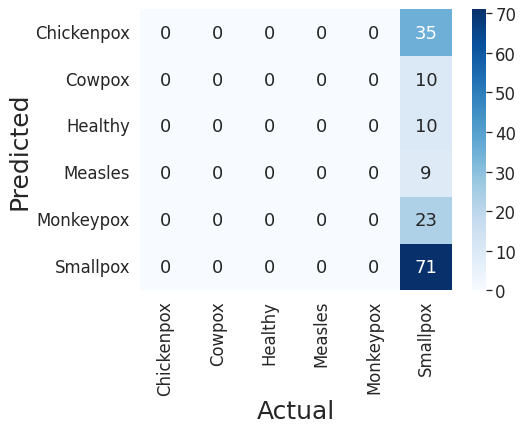

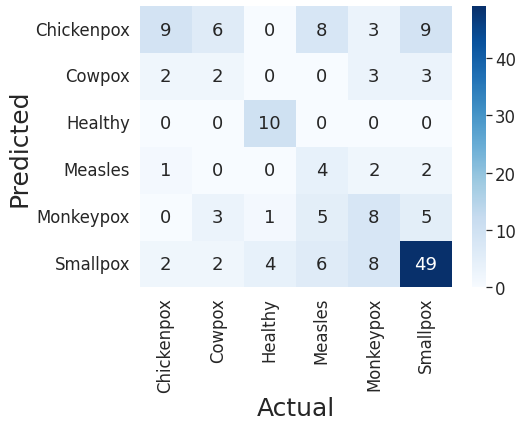

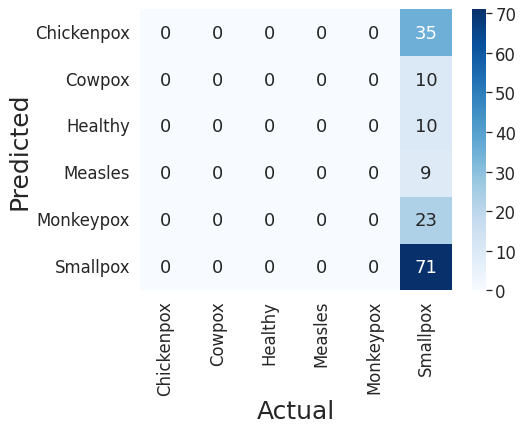

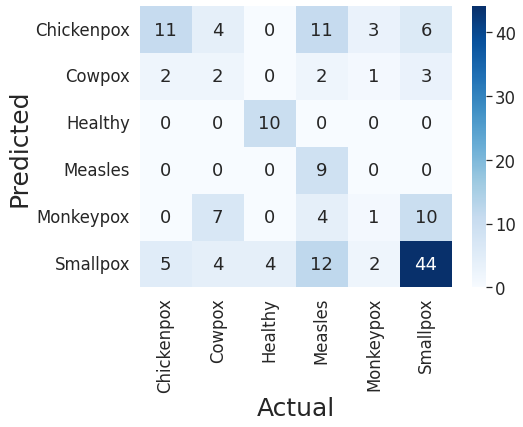

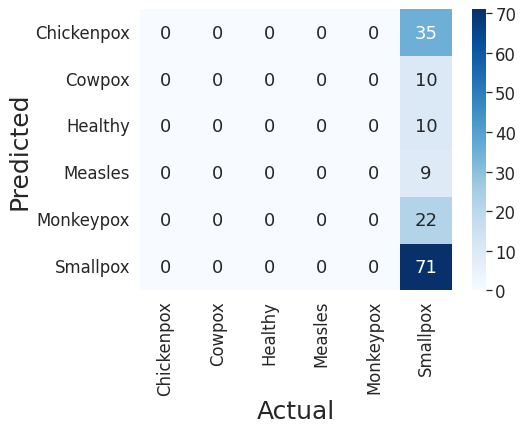

In [15]:
# vgg
import matplotlib.pyplot as plt
for i in range(1, 6):
    pr = np.load(f'predicted_vgg16_f{i}.npy')
    ac = np.load(f'actual_vgg16_f{i}.npy')
    cf_matrix = confusion_matrix(ac, pr)
    
    plt.figure('check', (7, 30))
    plt.subplot(5, 1, i)
    sns.set(font_scale=1.5)
    p = sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    p.set_xlabel("Actual", fontsize = 25)
    p.set_ylabel("Predicted", fontsize = 25)

    plt.show()

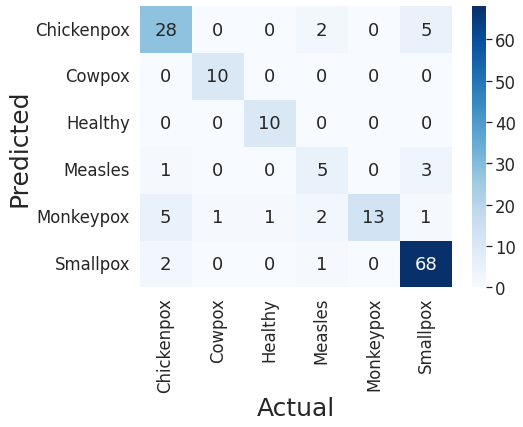

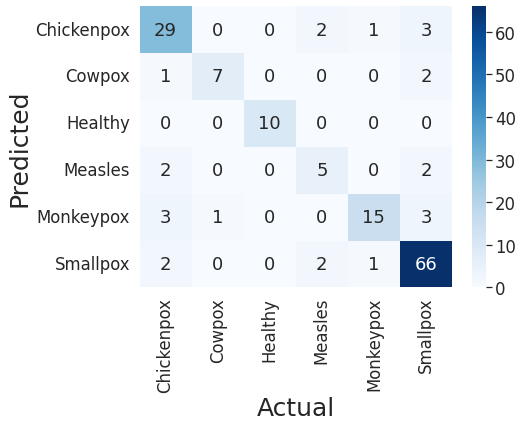

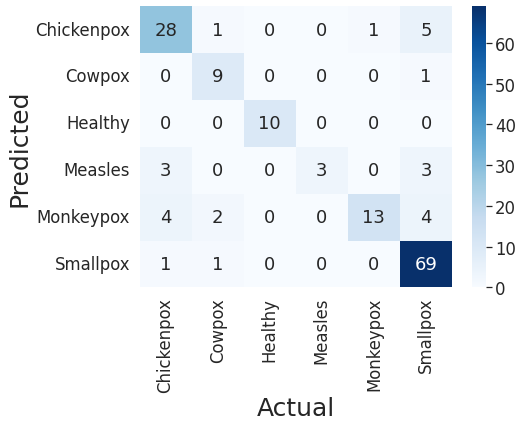

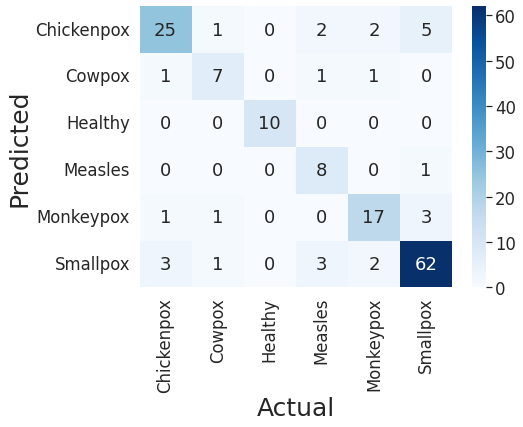

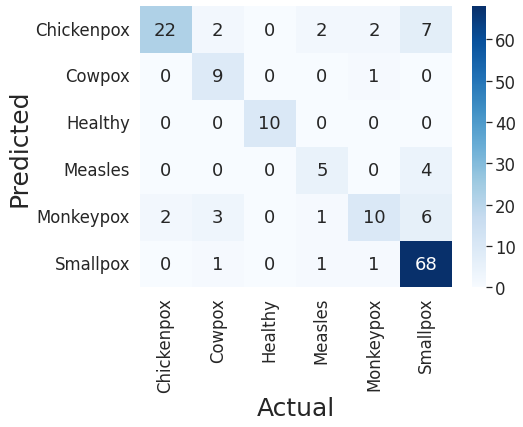

In [28]:
for i in range(1, 6):
    pr_rn = np.load(f'predicted_resnet50_f{i}.npy')
    pr_dn = np.load(f'predicted_densenet121_f{i}.npy')
    pr_sqn = np.load(f'predicted_squeezenet1_1_f{i}.npy')
    pr_sfn = np.load(f'predicted_shfflenetv2_1_f{i}.npy')
    pr_mnn = np.load(f'predicted_mnasnet1_0_f{i}.npy')
    pr_mn = np.load(f'predicted_mobilenet_v2_f{i}.npy')
    pr_in = np.load(f'predicted_inception_v3_f{i}.npy')
    ac = np.load(f'actual_resnet50_f{i}.npy')
          
    majority_voting = np.array([])
    for j in range(len(ac)):
        majority_voting = np.append(majority_voting, np.bincount(np.array([pr_rn[j], pr_dn[j], pr_sqn[j], pr_sfn[j], pr_mnn[j], pr_mn[j], pr_in[j]]).astype(int)).argmax())
                    
    
    cf_matrix = confusion_matrix(ac, majority_voting)
    
    plt.figure('check', (7, 30))
    plt.subplot(5, 1, i)
    sns.set(font_scale=1.5)
    p = sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    p.set_xlabel("Actual", fontsize = 25)
    p.set_ylabel("Predicted", fontsize = 25)

    plt.show()
            

In [29]:
for i in range(1, 6):
    pr_rn = np.load(f'predicted_resnet50_f{i}.npy')
    pr_dn = np.load(f'predicted_densenet121_f{i}.npy')
    pr_sqn = np.load(f'predicted_squeezenet1_1_f{i}.npy')
    pr_sfn = np.load(f'predicted_shfflenetv2_1_f{i}.npy')
    pr_mnn = np.load(f'predicted_mnasnet1_0_f{i}.npy')
    pr_mn = np.load(f'predicted_mobilenet_v2_f{i}.npy')
    pr_in = np.load(f'predicted_inception_v3_f{i}.npy')
    ac = np.load(f'actual_resnet50_f{i}.npy')
          
    majority_voting = np.array([])
    for j in range(len(ac)):
        majority_voting = np.append(majority_voting, np.bincount(np.array([pr_rn[j], pr_dn[j], pr_sqn[j], pr_sfn[j], pr_mnn[j], pr_mn[j], pr_in[j]]).astype(int)).argmax())
        
        
        
    target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
    print(classification_report(ac, majority_voting, target_names=target_names))    

              precision    recall  f1-score   support

  Chickenpox       0.78      0.80      0.79        35
      Cowpox       0.91      1.00      0.95        10
     Healthy       0.91      1.00      0.95        10
     Measles       0.50      0.56      0.53         9
   Monkeypox       1.00      0.57      0.72        23
    Smallpox       0.88      0.96      0.92        71

    accuracy                           0.85       158
   macro avg       0.83      0.81      0.81       158
weighted avg       0.86      0.85      0.84       158

              precision    recall  f1-score   support

  Chickenpox       0.78      0.83      0.81        35
      Cowpox       0.88      0.70      0.78        10
     Healthy       1.00      1.00      1.00        10
     Measles       0.56      0.56      0.56         9
   Monkeypox       0.88      0.68      0.77        22
    Smallpox       0.87      0.93      0.90        71

    accuracy                           0.84       157
   macro avg       0.83

In [10]:
import numpy as np
from sklearn.metrics import classification_report

pr = np.array([])
ac2 = np.array([])
for i in range(1, 6):
    pr_rn = np.load(f'predicted_resnet50_f{i}.npy')
    pr_dn = np.load(f'predicted_densenet121_f{i}.npy')
    pr_sqn = np.load(f'predicted_squeezenet1_1_f{i}.npy')
    pr_sfn = np.load(f'predicted_shfflenetv2_1_f{i}.npy')
    pr_mnn = np.load(f'predicted_mnasnet1_0_f{i}.npy')
    pr_mn = np.load(f'predicted_mobilenet_v2_f{i}.npy')
    pr_in = np.load(f'predicted_inception_v3_f{i}.npy')
    ac = np.load(f'actual_resnet50_f{i}.npy')
          
    majority_voting = np.array([])
    for j in range(len(ac)):
        majority_voting = np.append(majority_voting, np.bincount(np.array([pr_rn[j], pr_dn[j], pr_sqn[j], pr_sfn[j], pr_mnn[j], pr_mn[j], pr_in[j]]).astype(int)).argmax())

    pr = np.append(pr, majority_voting)
    ac2 = np.append(ac2, ac)
    
target_names = ['Chickenpox','Cowpox','Healthy','Measles','Monkeypox','Smallpox']
print(classification_report(ac2, pr, target_names=target_names))

              precision    recall  f1-score   support

  Chickenpox       0.81      0.75      0.78       175
      Cowpox       0.74      0.84      0.79        50
     Healthy       0.98      1.00      0.99        50
     Measles       0.58      0.58      0.58        45
   Monkeypox       0.85      0.61      0.71       112
    Smallpox       0.85      0.94      0.89       355

    accuracy                           0.83       787
   macro avg       0.80      0.79      0.79       787
weighted avg       0.83      0.83      0.82       787

